# Lesson 10 Final Project Hands On Helper

In [1]:
from IPython.display import VimeoVideo
# Tutorial Video Name: Data Science Software
VimeoVideo('647540720', width=720, height=480)

https://vimeo.com/647540720

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

# Scenario 1 - One Proportion Z test

In [2]:
count = 135
nobs = 195
value = .75
stat, pval = proportions_ztest(count, nobs, value)
print(stat, pval)

-1.7455300054711183 0.08089265412686554


Since the p-value is above .05 so we retain the null hypothesis. 

## Scenario 2 - Chi Square Test

In [3]:
therapyPets = pd.read_csv("../../Data/PetTherapy.csv")
therapyPets.head()

,Location,PetType,NumberTherapyVisitRequests
0,1,Gecko,29
1,1,Puppy,73
2,1,Cat,2
3,1,Hamster,39
4,2,Gecko,39


In [4]:
Pets_pivot = pd.pivot_table(therapyPets,index='PetType',columns='Location',values="NumberTherapyVisitRequests")
Pets_pivot

Location,1,2,3
PetType,,,
Cat,2,10,22
Gecko,29,39,82
Hamster,39,66,193
Puppy,73,117,304


In [5]:
stats.chi2_contingency(Pets_pivot)

(7.34139487302036,
 0.29042548747936403,
 6,
 array([[  4.98155738,   8.08196721,  20.93647541],
        [ 21.97745902,  35.6557377 ,  92.36680328],
        [ 43.66188525,  70.83606557, 183.50204918],
        [ 72.37909836, 117.42622951, 304.19467213]]))

Returns test statistic, p-value, df, and expected values.

Since the p value is above .05, we retain the null hypothesis.

# Scenario 3 - One way ANOVA

In [18]:
ImpactFactor = pd.read_csv("../../Data/ImpactFactor.csv")
ImpactFactor.head()

,SAGE,Elsevier,Wiley-Blackwell,Springer Nature
0,644.0,122642,47455.0,23868.0
1,1202.0,100190,219519.0,14560.0
2,2416.0,10525,84141.0,17098.0
3,6565.0,40064,3710.0,30740.0
4,2824.0,5317,3096.0,17948.0


In [19]:
ImpactExpanded=pd.melt(ImpactFactor,var_name='Group', value_name='Citations')
ImpactExpanded.head()

,Group,Citations
0,SAGE,644.0
1,SAGE,1202.0
2,SAGE,2416.0
3,SAGE,6565.0
4,SAGE,2824.0


In [20]:
ImpactExpanded = ImpactExpanded.replace(ImpactFactor.columns, [0,1,2,3])

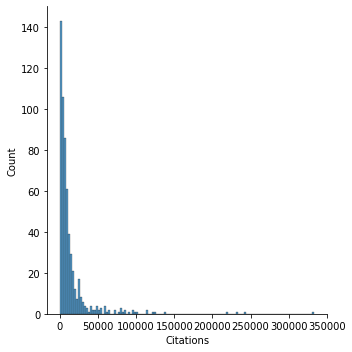

In [24]:
sns.displot(ImpactExpanded.Citations)

*Not normally distributed, so should transform*

In [21]:
# Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances. 
scipy.stats.bartlett(ImpactExpanded['Citations'], ImpactExpanded['Group'])
# Since the p value is below .05, there is not equal variance

BartlettResult(statistic=23367.873956494397, pvalue=0.0)

In [14]:
# Fligner’s test tests the null hypothesis that all input samples are from populations with equal variances.
scipy.stats.fligner(ImpactExpanded['Citations'], ImpactExpanded['Group'])
# Since the p value is below .05, there is not equal variance

FlignerResult(statistic=1555.3785491294248, pvalue=0.0)

In [15]:
ImpactExpanded.dropna(inplace=True)

In [16]:
# The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.
stats.f_oneway(ImpactExpanded['Citations'][ImpactExpanded['Group']==0],
              ImpactExpanded['Citations'][ImpactExpanded['Group']==1],
              ImpactExpanded['Citations'][ImpactExpanded['Group']==2],
              ImpactExpanded['Citations'][ImpactExpanded['Group']==3])

F_onewayResult(statistic=1.6345321119995455, pvalue=0.18023390165215977)

Since the p value is greater than .05, we retain the null hypothesis-no differences between groups

# Scenario 4 - Two Proportion Z Test

In [22]:
count = np.array([58, 20])
nobs = np.array([92, 77])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

4.814273957654004 1.4773602105768518e-06


Since our p value is less than .05, we determine these proportions are different. 